<a href="https://colab.research.google.com/github/dmorton714/data_2_check/blob/master/kno_chk_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns 

Reads in the sheet from GitHub


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dmorton714/louisville_metro/main/SalaryData.csv', encoding='cp1252')

df.head()




,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total
0,2020,NaN,Parks & Recreation,Park Worker II-CDL,33321.6,1249.56,0.0,0.0,0.0,1249.56
1,2020,NaN,Parks & Recreation,Recreation Instructor,22880.0,569.25,0.0,0.0,0.0,569.25
2,2020,NaN,Parks & Recreation,Recreation Aide,21840.0,152.25,0.0,0.0,0.0,152.25
3,2020,NaN,Human Services,Staff Helper/Internal,21008.0,333.30,0.0,0.0,0.0,333.30
4,2020,NaN,Parks & Recreation,Recreation Aide,21840.0,152.25,0.0,0.0,0.0,152.25


This drops the columns I dont need. 

In [3]:
df.drop(columns=['Employee_Name', 'YTD_Total', 'Regular_Rate', 'Overtime_Rate', 'Incentive_Allowance', 'Other'], inplace=True)
df.rename(columns={'CalYear':'Year'}, inplace=True)
df.head()

,Year,Department,jobTitle,Annual_Rate
0,2020,Parks & Recreation,Park Worker II-CDL,33321.6
1,2020,Parks & Recreation,Recreation Instructor,22880.0
2,2020,Parks & Recreation,Recreation Aide,21840.0
3,2020,Human Services,Staff Helper/Internal,21008.0
4,2020,Parks & Recreation,Recreation Aide,21840.0


This sorts the sheet by department 

In [ ]:
df.sort_values(by='Department', inplace=True)

df.head()

,Year,Department,jobTitle,Annual_Rate
18010,2019,Air Pollution Control,APCD Engineer I,62753.6
10221,2016,Air Pollution Control,Community Outreach Coord,48110.4
10220,2017,Air Pollution Control,Community Outreach Coord,49067.2
34227,2020,Air Pollution Control,Executive Assistant,35734.4
34228,2022,Air Pollution Control,Executive Assistant,40560.0


This drops all the dates that are not 2022

In [ ]:
df.drop(df[df['Year'] != 2022].index, inplace=True)
df.head()

,Year,Department,jobTitle,Annual_Rate
34228,2022,Air Pollution Control,Executive Assistant,40560.0
10151,2022,Air Pollution Control,Management Assistant U310,55889.6
10224,2022,Air Pollution Control,Community Outreach Coord,57928.0
10401,2022,Air Pollution Control,APCD Field Technician U310,55328.0
17459,2022,Air Pollution Control,APCD Engineer III,85904.0


This calculates the total annual rate of the LMPD 

In [ ]:
# df.groupby('Department')['Annual_Rate'].sum()['Air Pollution Control']
df.groupby('Department')['Annual_Rate'].sum()['Louisville Metro Police'].sum()

101592688.6

In [ ]:
#find unique points values
department = df.Department.unique()

#sort values smallest to largest
department.sort()

#display sorted values
department

# print(df['Annual_Rate'].max())

array(['Air Pollution Control', 'Belle of Louisville',
       'Commonwealth Attorney', 'Coroner', 'County Attorney',
       'Criminal Justice Commission', 'Develop Louisville',
       'Economic Development', 'Emergency Mgt Agency/MetroSafe',
       'Finance', 'Human Relations Commission', 'Human Resources',
       'Human Services', 'Inspections, Permits & License',
       'Internal Auditor', 'Kentuckiana Works Foundation', 'Library',
       'Louisville Fire', 'Louisville Metro EMS',
       'Louisville Metro Police', 'Louisville Zoo', "Mayor's Office",
       'Metro Animal Services', 'Metro Corrections', 'Metro Council',
       'Office of Equity', 'Office of Inspector General',
       'Office of Performance Improvmt', 'Other Officials',
       'Parking Authority of River Cty', 'Parks & Recreation',
       'Public Health & Wellness', 'Public Works', 'Revenue Commission',
       'Safe & Healthy Neighborhoods', 'Solid Waste Management',
       'Technology Services', 'Waterfront Development

This is the sum of all the departments. Cant figure out how to get it to total without the scientific notation. 

In [ ]:
# df.groupby(by=["Department"])["Annual_Rate"].sum()
# df.groupby(by=["Department"])["Annual_Rate"].sum()


df.groupby(by=["Department"])["Annual_Rate"].sum()


# def myfunction():
#     value = df.groupby(by=["Department"])["Annual_Rate"].sum(0)
#     return value

# sums = myfunction()

# print('sums')



Department
Air Pollution Control             3.488620e+06
Belle of Louisville               2.799632e+06
Commonwealth Attorney             1.375483e+06
Coroner                           1.012645e+06
County Attorney                   7.203160e+06
Criminal Justice Commission       3.465800e+05
Develop Louisville                7.237064e+06
Economic Development              1.776429e+06
Emergency Mgt Agency/MetroSafe    1.007166e+07
Finance                           8.074546e+06
Human Relations Commission        6.709456e+05
Human Resources                   3.041223e+06
Human Services                    7.347980e+06
Inspections, Permits & License    1.056624e+07
Internal Auditor                  5.482308e+05
Kentuckiana Works Foundation      1.780618e+06
Library                           1.237174e+07
Louisville Fire                   3.029694e+07
Louisville Metro EMS              9.306935e+06
Louisville Metro Police           1.015927e+08
Louisville Zoo                    1.028499e+07
Ma

This plots the highest paid position per department. 

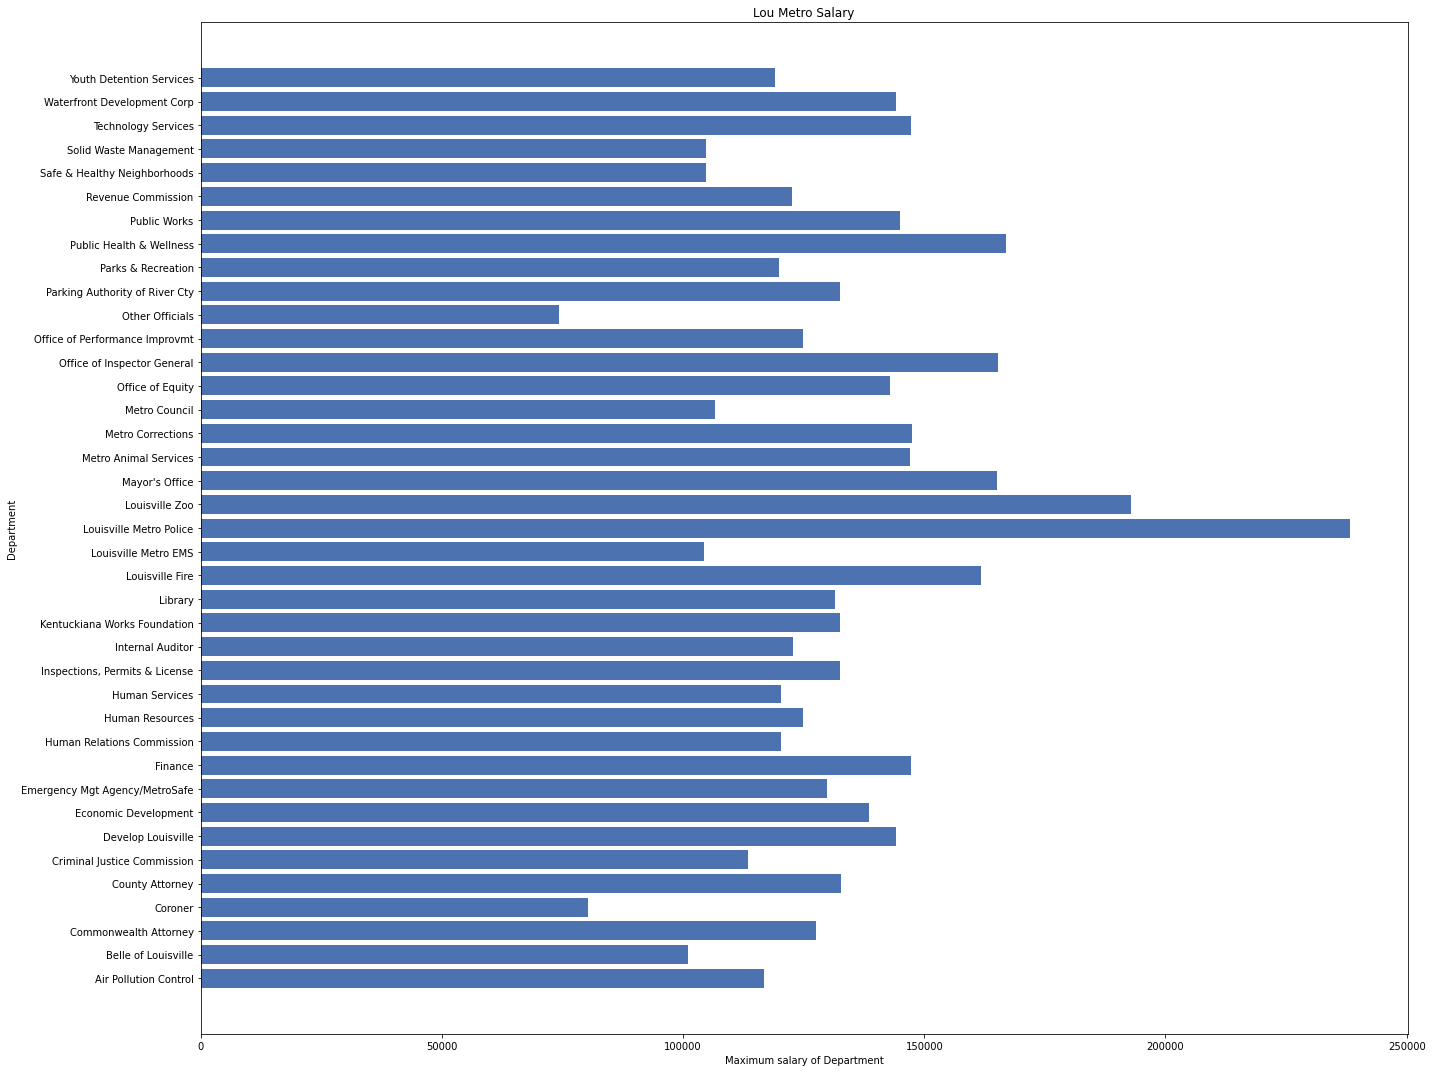

In [ ]:
plt.style.use('seaborn-deep')
plt.figure(figsize= (20,15))
plt.barh('Department', 'Annual_Rate', data = df)
plt.ylabel('Department')
plt.xlabel('Maximum salary of Department')
plt.title('Lou Metro Salary')
plt.tight_layout()
plt.show()

In [ ]:
df2 = df.groupby('Department')['Annual_Rate'].apply(list)

print(df2)
              


Department
Air Pollution Control             [40560.0, 55889.6, 57928.0, 55328.0, 85904.0, ...
Belle of Louisville               [21596.12, 39520.0, 44928.0, 36400.0, 58406.4,...
Commonwealth Attorney             [92001.0, 34144.5, 31999.5, 50602.5, 56199.0, ...
Coroner                           [47216.0, 55328.0, 55328.0, 55328.0, 55328.0, ...
County Attorney                   [32552.0, 113505.6, 78657.28, 66144.0, 87089.6...
Criminal Justice Commission          [52041.6, 52041.6, 73788.0, 113464.0, 55244.8]
Develop Louisville                [62878.4, 65280.8, 31512.0, 61401.6, 52291.2, ...
Economic Development              [68302.0, 68078.4, 96943.6, 75808.2, 79315.6, ...
Emergency Mgt Agency/MetroSafe    [54641.6, 66664.0, 60798.4, 54641.6, 60798.4, ...
Finance                           [89440.0, 59550.4, 49628.8, 68868.8, 48443.2, ...
Human Relations Commission        [42473.6, 40144.0, 120273.4, 55952.0, 31200.0,...
Human Resources                   [52041.6, 55224.0, 44075.2, 130